## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



## Regresión polinomial en el conjunto de datos de vivienda de Boston

**En este cuaderno hacemos un estudio comparativo de la precisión de la regresión lineal y la regresión polinomial en el conjunto de datos de viviendas de Boston**

Estos datos originalmente formaban parte del repositorio de Machine Learning de UCI, y ahora se eliminaron. Estos datos también se envían con la biblioteca scikit-learn.
Hay 506 muestras y 13 variables de características en este conjunto de datos. El objetivo es predecir el valor de los precios de la casa utilizando las características dadas.

La descripción de todas las características se da a continuación:

  **CRIM**: Tasa de criminalidad per cápita por ciudad

  **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados

  **INDUS**: Proporción de acres comerciales no minoristas por ciudad

  **CHAS**: variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)

  **NOX**: concentración de óxido nítrico (partes por 10 millones)

  **RM**: Promedio de cuartos por vivienda

  **EDAD**: Proporción de unidades ocupadas por propietarios construidas antes de 1940

  **DIS**: distancias ponderadas a cinco centros de empleo de Boston

  **RAD**: Índice de accesibilidad a carreteras radiales

  **IMPUESTOS**: Tasa de impuesto a la propiedad de valor total por cada $10,000

  **B**: 1000(Bk - 0.63)², donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad

  **LSTAT**: Porcentaje de estatus más bajo de la población

  **MEDV**: valor medio de viviendas ocupadas por propietarios en miles de dólares

I**mport the required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

**Boston_dataset is a dictionary. let's check what it contains**


In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

**Load the data into pandas dataframe**

In [4]:
df_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# df_boston.info()
# df_boston.describe()
# df_boston.shape
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

In [5]:
df_boston['MEDV'] = boston_dataset.target

In [18]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

**Data preprocessing**

Check for missing values in all the columns

In [6]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Data Visualization**

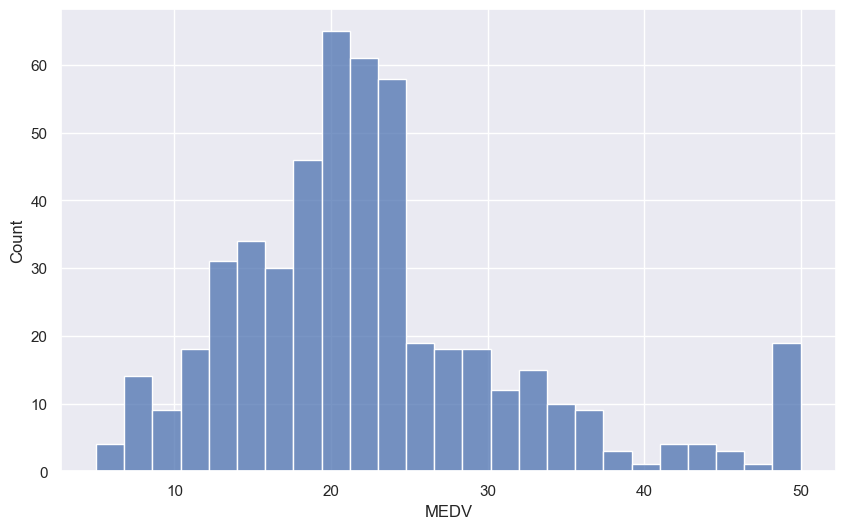

In [23]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the target values
sns.histplot(df_boston['MEDV'], bins = 25)
plt.show()

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap


*   From coorelation plot: which are the columns that are more highli correlated with **MEDV**

* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity


* Del gráfico de correlación: cuáles son las columnas que están más correlacionadas con **MEDV**

* Hay dos características altamente correlacionadas. Identifíquelos y suelte uno de ellos para evitar la multicolinealidad.

In [30]:
correlation_matrix = df_boston.corr()

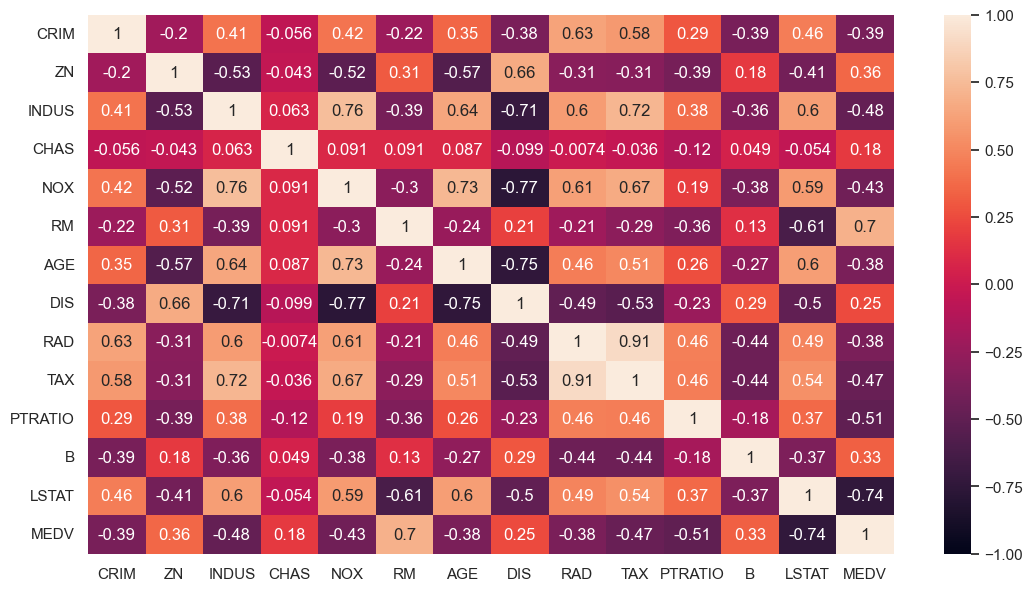

In [50]:
plt.figure(figsize=(13, 7))
sns.heatmap(data = correlation_matrix, vmin = -1, vmax = 1, annot = True);

* Del gráfico de correlación: cuáles son las columnas que están más correlacionadas con **MEDV**

* Hay dos características altamente correlacionadas. Identifíquelos y suelte uno de ellos para evitar la multicolinealidad.

El target MEDV está más correlacionado con ls columnas LSTAT y RM

Las columnas de las variables RAD y TAX están altamente correlacionados también, así que eliminamos cualquiera de las dos.

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

<Figure size 2000x500 with 0 Axes>

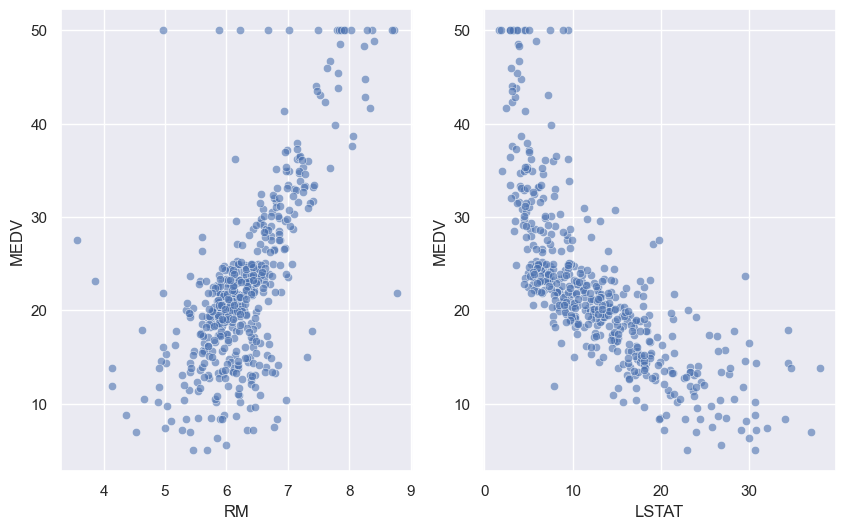

In [77]:
plt.figure(figsize=(20, 5))
fig, ax = plt.subplots(1, 2)

sns.scatterplot(data=df_boston, x='RM', y='MEDV', ax=ax[0], alpha=0.6)
sns.scatterplot(data=df_boston, x='LSTAT', y='MEDV', ax=ax[1], alpha=0.6);

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


**Preparar los datos para el entrenamiento**
Cree un marco de datos X que incluya las columnas **LSTAT** y **RM**.
Y debe ser una serie de pandas que incluya valores objetivo **'MEDV'**

In [62]:
X = pd.DataFrame(np.c_[df_boston['LSTAT'], df_boston['RM']], columns = ['LSTAT','RM'])
y = df_boston['MEDV']

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

**Dividir los datos en conjuntos de entrenamiento y prueba**

Divide el conjunto de datos de entrenamiento y prueba en 80%: 20%. Asigne random_state a cualquier valor. Esto asegura la consistencia. Imprime los marcos de los objetos resultantes.

In [60]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

Cree un modelo de regresión lineal con sklearn LinearRegression.
Usaremos el error cuadrático medio y la puntuación R2 para evaluar nuestro modelo, así que asegúrese de realizar las importaciones necesarias.

Importe las funciones necesarias y entrene un modelo de regresión lineal

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

**Evaluate the model performance in the training and testing sets**

In [65]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

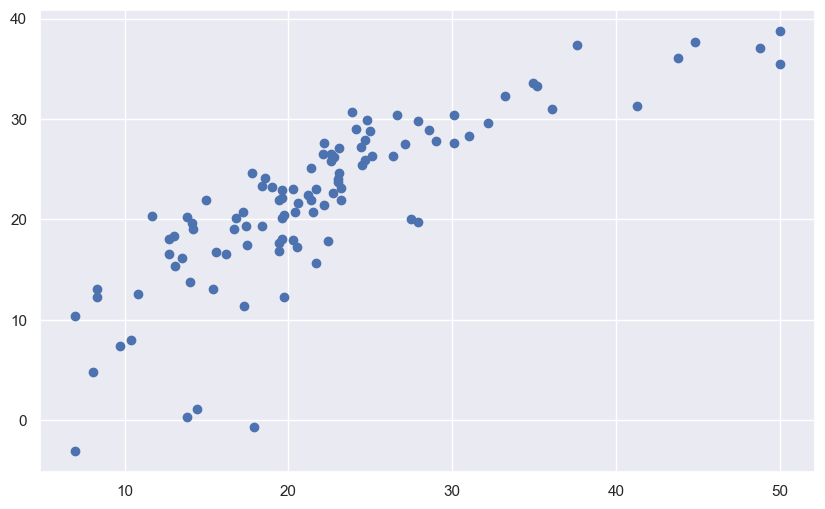

In [66]:
plt.scatter(y_test, y_test_predict)
plt.show()

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

Podemos ver que **LSTAT** no varía exactamente de forma lineal. Apliquemos la regresión polinomial con **grado 2** y hagamos la prueba.

Para generar los grados de orden superior, usamos la clase PolynomialFeatures de la biblioteca sklearn.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

**Did the model improve using the plolynomila model?**